# Activity 2: Applying the FT to NMR and IR
In this activity, we will get comfortable with functions and review plotting in python, then we will combine those skills to write some code which is able to Fourier Transform a combination of cosine waves.

## Learning Objectives:


**Part 1 FT-NMR:**
* Build an FID and use FFT libraries to process it
* Continue working with python libraries to process data and making plots
* Construct a fictitious FID signal and compute its FT using concepts from Activity 1
* Experiment with different parameters (t2, amplitude, phase, frequencies)
* Understand the effect of a decay of a signal


**Part 2 FT-IR:**
* Build wavelengths to represent data from an IR experiment
* Construct the absorbance data
* Apply FFT
* Build the %transmission vs cm$^{-1}$ plot you are familiar with from chem classes

In this activity, `?`s have been used to represent values or variable names which need replacing. Do not replace or rewrite any of the code other than what is marked with a `?`. The code will run without errors if you replace the `?`s with the correct values.


For this activity, we will be using `numpy` and `matplotlib` again to do math and plot functions again. We will also need our `create_wave` function from the previous activity.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# We will also set some plotting parameters for you
plt.rcParams["font.size"] = 14
plt.rcParams['font.family'] = 'serif'

# FT-NMR

In this part we will simulate a free induction decay, similar to what is produced during FT-NMR. To do this, we will make several cosine waves, sum them, and then multiply by a decay constant similar to Activity 1. Before we start, we will need to specify the duration of the FT-NMR experiment (in seconds) and the time between measurements (this can be thought of as the inverse of a sampling frequency). Use the space below to construct a `time_array` variable that corrsponds to a sampling rate of 100 $s^{-1}$ and a duraction of $2 \pi$ seconds. To use the variable $\pi$ in python, simply type `np.pi`.

In [2]:
sampling_rate = 100
dt = 1 / sampling_rate
duration = 2 * np.pi
time_array = np.arange(0, 2 * np.pi, 0.01)

Fill in the blanks in the function below for creating a cosine wave and use the cell directly below this function to make two sine waves both with amplitude 1 and frequencies of 4 and 10. Then, construct a `combined_wave` variable by summing `wave1` and `wave2`.

In [3]:
def create_cosine_wave(amplitude, frequency, time_array, phase=0):
   """
   x(t) = A cos(2π * f * t + ϕ)

   Args:
        amplitude - the amplitude A of the sinusoid
        frequency - the frequency f of the sinusoid
        time_array - time values, t
        phase - the phase ϕ of the sinusoid. Defaults to 0
   """

   wave = amplitude * np.cos(2 * np.pi * frequency * time_array + phase)

   return wave

In [4]:
wave1 = create_cosine_wave(1, 4, time_array)
wave2 = create_cosine_wave(1, 10, time_array)
combined_wave = wave1 + wave2

A key component of free induction decay (FID) is the *decay* itself. This can be done with a simple exponential decay which is multiplied by the wave values. Our exponential decay will be of the form $e^{-t/t_2^*}$, where $t_2^*$ is a constant and $e$ is Euler's constant. To use Euler's constant in Python, simply type `np.exp()`.

First, define $t_2^*$ with a value between 0 and 1, then create a new variable which stores the results of performing the $e^{-t/t_2^*}$ operation on the `time_array` from above. Then multiply the decay values with the `combined_wave` from above. This is your sample FID. Plot this function to see how a decay function alters the above `combined_wave`.

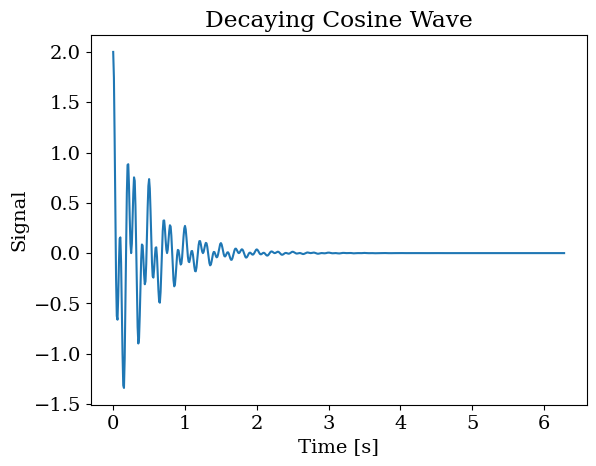

In [5]:
# Step 1: Define t2_star
# could be any value less than 1
t2_star = 0.5

# Step 2: Construct the exponential decay exp(-t/t2_star)
decay = np.exp(-time_array / t2_star)

# Step 3: Obtain the FID by multiplying the decay and the combined wave
FID = decay * combined_wave

# Step 4: Plot the FID as a function of time
plt.plot(time_array, FID)
plt.xlabel("Time [s]")
plt.ylabel("Signal")
plt.title("Decaying Cosine Wave")
plt.show()

Using the `np.fft.rfft` and `np.fft.rfftfreq` commands from the end of activity 1, compute the FT of the decaying cosine wave in the space below. If you get an error: `ComplexWarning: Casting complex values to real discards the imaginary part`, that is okay and it will not affect the final result.

/usr/local/lib/python3.10/dist-packages/matplotlib/cbook/__init__.py:1335: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


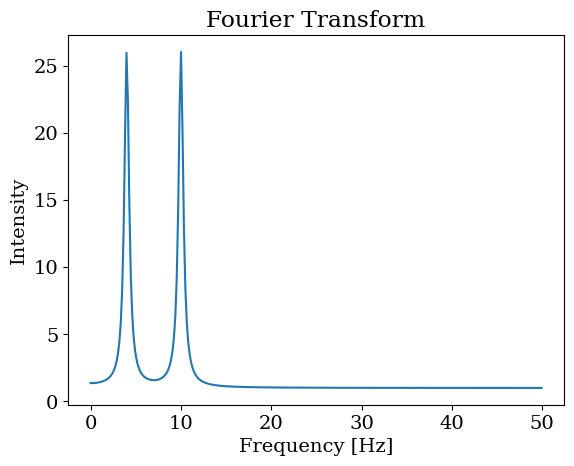

In [6]:
# measured fft
FID_FT = np.fft.rfft(FID)

# FFT frequency axis
freq_axis = np.fft.rfftfreq(len(time_array), d=dt)

# plot the FFT
plt.plot(freq_axis, FID_FT)
plt.xlabel("Frequency [Hz]")
plt.ylabel("Intensity")
plt.title("Fourier Transform")
plt.show()

### Questions 1-4

1. What do you notice about the position of the peaks? How do they relate to the frequencies of the sinusoids you defined above? How does this experiment compare to the outcomes of activity 1 (the activity using audio)?

**The peaks are centered at the input frequency values with one peak corresponding to the frequency of `wave1` and the other peak to the frequency of `wave2`. In Activity 1, the input waves had frequencies for each component pitch of the chord and the FT showed those frequencies; in this activity, the individual frequenices of the cosine wave are  shown after the FT. Also in Activity 1, the signals were sharp, well defined peaks, but in this activity, the signals have some width to them (as a result of the t2* decay).**

2. Re-run the above code by changing the amplitude of the input sine waves. How does this affect the resulting spectrum? What happens when the amplitude is doubled? Halved?

**The amplitude of the input cosine waves is directly related to the height/magnitude of the signal after performing the FT. When the amplitude is doubled the peak height doubles, and when halved, the peak height halves.**

3. Recall that the t2* is found in an exponential function: exp(-t/t2*).

  a. What do you expect will happen if you make t2* really large? Test this prediction using the code and note what happens.

  **As the t2* gets larger, the peak width gets smaller. This is expected since an increase in t2* results in the value of the exponent approaching 0, and thus the decay term approaches 1.**

  b. What do you expect will happen if you make t2* really small? Test this prediction using the code and note what happens.

  **As the t2* gets smaller, the peak width gets larger, until the peaks are no longer visible. Again, this is expected as a decrease in t2* results in a larger term in the exponent and the exponential decay eventually drowns out the signal component until it is no longer visible. (t2* = 0.05 still shows a little bit of signal; t2* = 0.01 shows nothing of meaning).**

4. How does changing the phase (the fourth parameter in `create_wave()`) from zero affect the resulting FT?

**Phase shifts have various effects on the FT. A phase shift of $\tfrac{\pi}{2}$ results in the first half of the signal being negative and the second half positive. A phase shift of $\pi$ results in the entire signal being negative. A phase shift of $\tfrac{3\pi}{2}$ results in the first half of the signal being positive and the second half negative. A phase shift of 0 or $2\pi$ result in an all positive signal.**

# FT-IR

In addition to FT-NMR experiments, the Fourier Transform is an essential tool in processing infrared spectroscopy data, hence the 'FT' in FT-IR. Shown below is an image of the IR spectrum of 3-pentanone, a simple hydrocarbon with a ketone in the middle. Notice the distinct carbonyl stretch near 1720 cm$^{-1}$. Even simple looking molecules such as this, produce intricate IR spectra and all of this data is obtained through the Fourier transform. In this example, you will use the FFT algorithm to understand the origins of the carbonyl stretching frequency using simulated data.

Image from [webbook.nist.gov](https://webbook.nist.gov/cgi/inchi/InChI%3D1S/C5H10O/c1-3-5(6)4-2/h3-4H2%2C1-2H3).
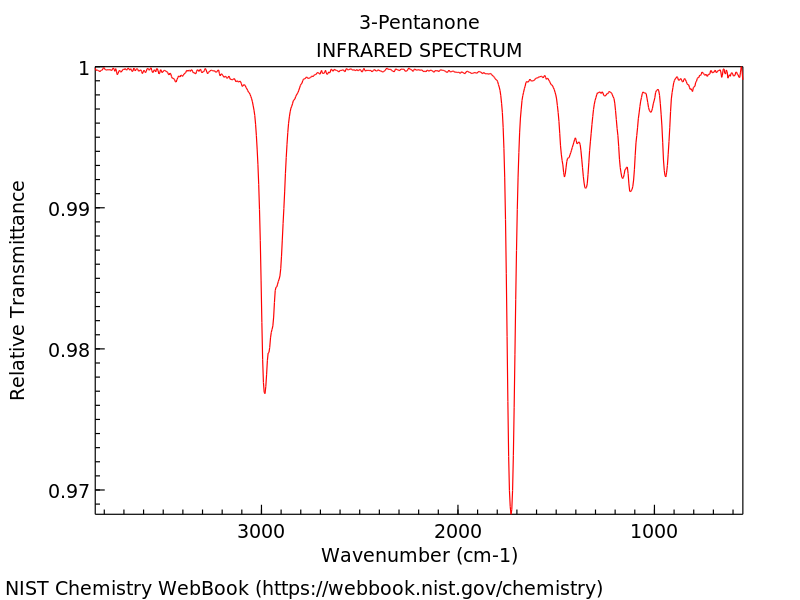

### Question 5

5. What are the major functional groups in 3-pentanone? Where do you see the transitions corresponding to these functional groups (give the approximate wavenumber of the transition)?

**The major functional groups in 3-pentanone are the ketone group (\~1720 wavenumbers), the C-H stretching motif (\~3000 wavenumbers), and the methylene groups (~800-1600 wavenumbers).**

To begin, use the space below to convert 1720 cm$^{-1}$ to a frequency in units of Hz.

In [7]:
# Use this space to convert the 1720 cm^{-1} to a frequency
wavenumber = 1720

# speed of light in m/s; to write `10 to the 8th` in python, use: `10 ** 8`
c = 2.998 * 10 ** 8

# Convert wavenumbers from cm^-1 to m
wavelength_meters = (1 / wavenumber) * 0.01

# calculate the frequency using E = hv = hc / wavelength
frequency = c / wavelength_meters
print(frequency)

51565600000000.0


### Question 6
6. Given below is a starting point for your `dt` and your `tsteps` values. `tsteps` can be thought of as the total number of samples we collect, and the `dt` value is the time between each. Vary the `dt` by $\pm$ 1 order of magnitude and record your observations as to how this affects the resulting wave when plotted.

In [ ]:
dt = 10 ** -16
tsteps = 100000
time_array = np.arange(0, tsteps, 1) * dt

Use the `frequency` and `time_array` variables you have defined to create a sine wave in the space below and then plot it with $x$-limit values `(0, 10e-15)`.

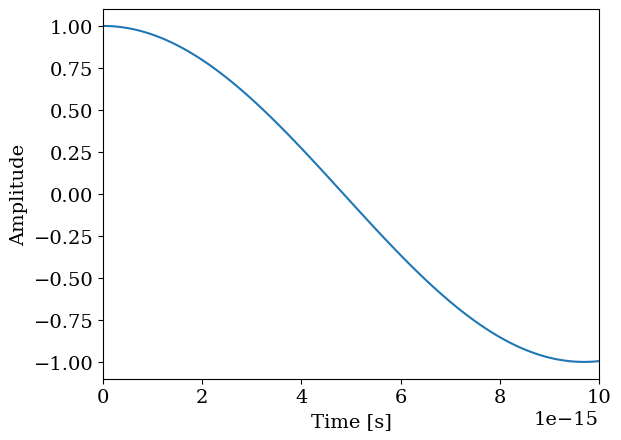

In [ ]:
wave = create_cosine_wave(1, frequency, time_array)
plt.plot(time_array, wave)
plt.xlabel("Time [s]")
plt.ylabel("Amplitude")
plt.xlim(0, 10e-15)
plt.show()

Before moving on to the next steps, make sure that you have re-adjusted the `dt` and the `tsteps` to match what was originally given.

`dt = 10 ** -16`

`tsteps = 100000`

Next, you should have gotten $5.15656 \times 10^{14}$ Hz. Since we plan on making a few waves in this section, let's repackage the above code into a function so that we do not have to repeat this calculation.

In [ ]:
def make_IR_waves(time_array, wavenumber):

  # The speed of light
  c = 2.998 * 10e8

  # Convert wavenumbers from cm^-1 to m
  wavelength_meters = (1 / wavenumber) * 0.01

  # calculate the frequency using E = hv = hc / wavelength
  frequency = c / wavelength_meters
  period = 1 / frequency

  wave = create_cosine_wave(1, frequency, time_array)

  return wave

In an FT-IR experiment, the light used to probe the sample contains many wavelengths of light, all of which are sent through the sample at one time. Depending on the molecule, certain wavelengths excite certain vibrational transitions within the molecule, including symmetric and asymmetric stretching, wagging, scissoring, or rocking to name a few, leading to absorption of the incident light at those specific wavelengths or energies.

In this exercise, we will focus on modeling the 3-pentanone spectrum above which has distinct features at 1720 and 3000 cm$^{-1}$. For simplicity, we will not be looking at the effect of sending all possible IR wavelengths into our sample. In this activity, we will focus on sending in five wavelengths (1200 cm$^{-1}$, 1720 cm$^{-1}$, 2900 cm$^{-1}$, 3000 cm$^{-1}$, and 3500 cm$^{-1}$) and examine the spectrum under the assumption that our sample absorbs 10% of the 1720 cm$^{-1}$ and 5% of the 3000 cm$^{-1}$ and that all other wavelengths of light pass through the sample.

Use the `time_array` and the `make_waves` function to create five waves (wave1, wave2, wave3, wave4, wave5) one for each of the following frequencies 1200 cm$^{-1}$, 1720 cm$^{-1}$, 2900 cm$^{-1}$, 3000 cm$^{-1}$, and 3500 cm$^{-1}$.

In [ ]:
wave1 = make_IR_waves(time_array, 1200)
wave2 = make_IR_waves(time_array, 1720)
wave3 = make_IR_waves(time_array, 2900)
wave4 = make_IR_waves(time_array, 3000)
wave5 = make_IR_waves(time_array, 3500)

Use the space below to construct two new waves. The first wave will be called `background` and will be the average of the five waves you defined above. The second wave will be called `measured` and will be similar to the `background` wave, except we will assume that the sample absorbs 10% of the incident radiation corresponding to 1720 cm$^{-1}$ and 5% of the 3000 cm$^{-1}$, while all other wavelengths pass through the sample.

In [ ]:
# add waves
background = (wave1 + wave2 + wave3 + wave4 + wave5) / 5
measured = (wave1 + 0.90 * wave2 + wave3 + 0.95 * wave4 + wave5) / 5

Plot each of the waves below as well as the `background` wave with limits `(0, 5 * 10e-16)`. We use `alpha` parameter in the plots below to make the waves appear transparent so that the plot is not a complete eyesore.

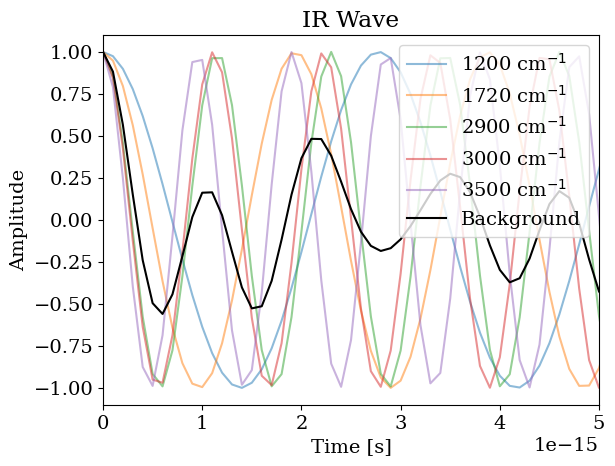

In [ ]:
plt.plot(time_array, wave1, alpha=0.5, label="1200 cm$^{-1}$")
plt.plot(time_array, wave2, alpha=0.5, label="1720 cm$^{-1}$")
plt.plot(time_array, wave3, alpha=0.5, label="2900 cm$^{-1}$")
plt.plot(time_array, wave4, alpha=0.5, label="3000 cm$^{-1}$")
plt.plot(time_array, wave5, alpha=0.5, label="3500 cm$^{-1}$")
plt.plot(time_array, background, c="black", label="Background")
plt.xlabel("Time [s]")
plt.ylabel("Amplitude")
plt.title("IR Wave")
plt.xlim(0, 5*10e-16)
plt.legend(loc="upper right")
plt.show()

### Question 7

7. Plot both the `background` and `measured` waves together with limits `(0, 5 * 10e-16)`. What do you observe?

**The measured wave is slightly different from the background wave, almost as if it has been compressed towards y=0 by just a small amount.**

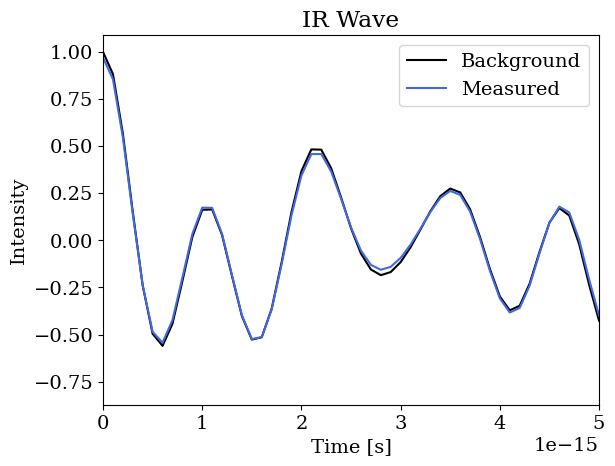

In [ ]:
plt.plot(time_array, background, c="black", label="Background")
plt.plot(time_array, measured, c="royalblue", label="Measured")
plt.xlabel("Time [s]")
plt.ylabel("Intensity")
plt.title("IR Wave")
plt.xlim(0, 5 * 10e-16)
plt.legend(loc="upper right")
plt.show()

Use the space below to compute the FT of both the `measured` and `background` waves. When defining new variables, keep in mind that they should have sensible names such as `measured_ft` and `background_ft`. Also create a variable called `freq_axis` as done in previous exercises.

In [ ]:
# background fft
background_fft = np.fft.rfft(background)

# measured fft
measured_fft = np.fft.rfft(measured)

# FFT frequency axis
freq_axis = np.fft.rfftfreq(len(time_array), d=dt)
print(len(time_array))

10000


### Question 8

8. Use the space below to plot both the `background_fft` and the `measured_fft` with the corresponding frequency axis you created above with $x$ limits `(0, 1e15)`. What do you observe? Does this look how you would expect?

**The signal should look different from what the student is expecting. For one, the spectra contains negative values. Also when looking at IR data in a textbook, online, or with a spectrometer, the data is usually given in terms of % transmittance. Finally, the frequency axis is not in the traditional units of wavenumbers (but rather in Hz here).**

/usr/local/lib/python3.10/dist-packages/matplotlib/cbook/__init__.py:1335: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


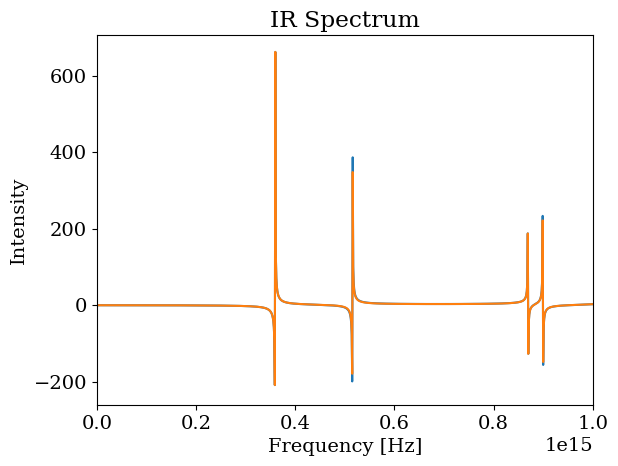

In [ ]:
plt.plot(freq_axis, background_fft)
plt.plot(freq_axis, measured_fft)
plt.xlabel("Frequency [Hz]")
plt.ylabel("Intensity")
plt.title("IR Spectrum")
plt.xlim(0, 1e15)
plt.show()

If the above spectrum is not what you expected, then that is okay! We still need to do some unit conversions so that we can get a spectrum that looks familiar. First, note that the above frequency axis will have units of Hz (think about why). Use the space below to convert this axis into a wavenumber axis that has units of cm$^{-1}$.

In [ ]:
wavenumbers = freq_axis / (c * 100)

Often times, we are concerned with the absorption spectrum which we can obtain by normalizing the magnitude of the current spectra. Use the space below to 1st compute the magnitude (absolute value) of the spectrum using the command `np.abs()`. Then compute the normalized spectrum by dividing the absolute value of the spectrum by its maximum value. To do this, you will need to use the `np.max()` command. Lastly, plot both normalized spectra with $x$ limits `(1000, 3500)`.

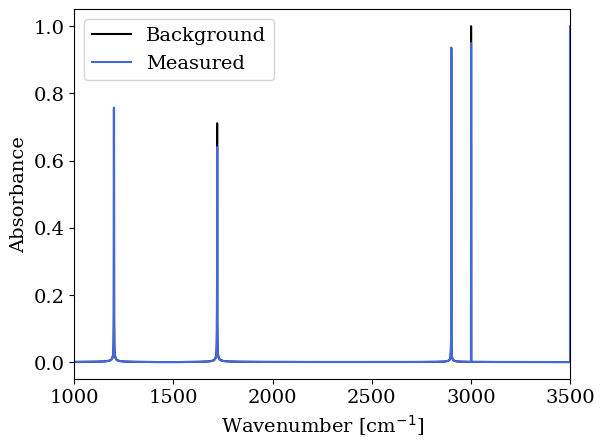

In [ ]:
# compute absolute value
background_abs_spec = np.abs(background_fft)
measured_abs_spec = np.abs(measured_fft)

# compute the normalized spectrum
background_absorbance = background_abs_spec / np.max(background_abs_spec)
measured_absorbance = measured_abs_spec / np.max(measured_abs_spec)

# plot both spectra
plt.plot(wavenumbers, background_absorbance, c="black", label="Background")
plt.plot(wavenumbers, measured_absorbance, c="royalblue", label="Measured")
plt.xlabel("Wavenumber [cm$^{-1}$]")
plt.ylabel("Absorbance")
plt.legend(loc="upper left")
plt.xlim(1000, 3500)
plt.show()

However, this still does not look like the IR spectra we are familiar with! To fix this, we lastly need to convert from intensity to percent transmittance using the following formula
$$A = - \log (T).$$

Plot the resulting curves. Note that you can reverse the order of the $x$-limits by putting the limits in the reverse order. In this case, rather than specifying `plt.xlim(1000, 3500)`, you can use `plt.xlim(3500, 1000)` to get the traditional ordering of wavenumbers on a spectrum.

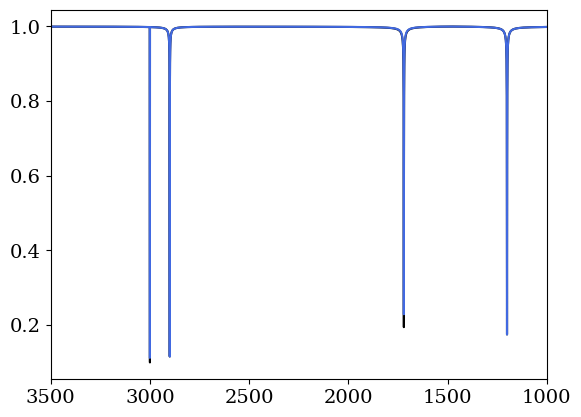

In [ ]:
# percent transmittance
background_transmittance = 10**(-background_absorbance)
measured_transmittance = 10**(-measured_absorbance)

plt.plot(wavenumbers, background_transmittance, c="black")
plt.plot(wavenumbers, measured_transmittance, c="royalblue")
plt.xlim(3500, 1000)
#plt.xlim(0, 2000)
plt.show()

In an actual IR experiment, the instrument first scans the background. Afterwards, you place your sample in the instrument for data collection. The spectrum you obtain will most likely have the background subtracted from it. Use some of the data you have generated from above to obtain a background subtracted IR spectrum of this molecule.

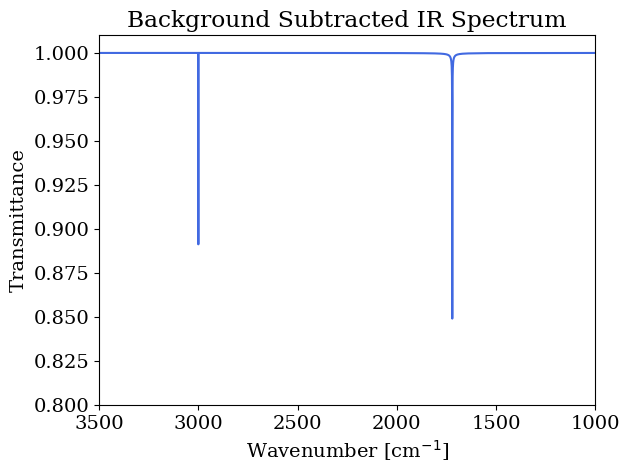

In [ ]:
# compute the difference
difference = background_absorbance - measured_absorbance
background_subtracted_transmittance = 10**(-np.abs(difference))

# plot the difference
plt.plot(wavenumbers, background_subtracted_transmittance, c="royalblue")
plt.xlim(3500, 1000)
plt.ylim(0.8, 1.01)
#plt.ylim(0.94, 1.001)
plt.xlabel("Wavenumber [cm$^{-1}$]")
plt.ylabel("Transmittance")
plt.title("Background Subtracted IR Spectrum")
plt.show()

### Question 9

9. How well does this match the above experimental spectrum of 3-pentanone? Comment on why this predicted spectrum does not fully
resemble the spectrum of 3-pentanone.

**This spectra is able to successfully show the C-H stretching motif and the carbonyl stretching motif for the 3-pentanone molecule. It is however missing the details of the "fingerprint" region (<1500 wavenumbers). This is because in a real IR experiment, the Globar irradiates the sample with many different wavelengths of light, not just the 5 we selected. As a result, it is able to obtain more information about the various functional groups of the molecule being examined.**